# PHYS 321 Coding Lab #2: Cosmological Distance Measures and Supernovae

In this coding lab, we will get some intution for cosmological distance measures and we will remake the "classic" supernova plot that convinced people that dark energy existed.

## Start with some git

We'll start this lab with some git exercises. If you haven't already, open the PDF document with git instructions for this Coding Lab. Complete Sections 1 and 2 before returning here.

## Cosmology review

In class, we looked at solutions to the *Friedman equation* which governs how the scale factor $a(t)$ of our Universe changes with time:

\begin{equation}
H^2 \equiv \left( \frac{\dot{a}}{a} \right)^2 = \frac{8 \pi G \rho}{3} - \frac{\kappa}{a^2}= \frac{8 \pi G}{3}(\rho_m + \rho_r + \rho_\Lambda + \dots) - \frac{\kappa}{a^2},
\end{equation}

where it is assumed that we are using units with $c\equiv1$, $G$ is the gravitational constant, and $\kappa$ is a curvature parameter. The Friedman equation connects the energy density of our Universe ($\rho$, which remember, changes with time as our Universe expands) to the expansion rate of our Universe. The total energy density can be broken down into the various constituents of our Universe, such that $\rho_m$ is the energy density of matter, $\rho_r$ is the energy density of radiation (e.g., photons), and $\rho_\Lambda$ is the energy density of dark energy (i.e., the mysterious vacuum energy that is causing our Universe's expansion to accelerate, which nobody understands). The quantity $H$ is known as the _Hubble parameter_. Suppose we assume that galaxies are just "glued" onto a particular coordinate location on the fabric of an expanding spacetime. Under this assumption, the motion of galaxies is due only to the fact that $a(t)$ is increasing with time---it is "scaling up" all distances like the name "scale factor" would suggest. This means that the distance $d$ to some faraway galaxy is proportional to $a(t)$, whereas its velocity is proportional to $\dot{a}$. Using $H \equiv \dot{a} / a$ then gives the empirical version of Hubble's Law that Hubble discovered:

\begin{equation}
v = H_0 d
\end{equation}

where we have assumed that we are looking at relatively nearby (in the cosmological sense) objects, so we are not looking very far into the past. In that case, $H$ is approximately equal to its present-day value of $H_0 \sim 70\,\frac{\textrm{km}/\textrm{s}}{\textrm{Mpc}}$. The units may seem funny, but they're very helpful for observers. Suppose I am looking at a bunch of different galaxies, each at a different distance away from me. Hubble's Law says that the further away a galaxy is, the more quickly it is receding from me. Intuitively, this is because the recession of galaxies is due to the expansion of space between a galaxy and me. Each little bit of space expands by the same amount, so the more space there is between us (i.e., the farther way the galaxy is), the bigger the effect of this expansion and the more quickly we fly apart. To say that $H_0 \sim 70\,\frac{\textrm{km}/\textrm{s}}{\textrm{Mpc}}$ is then saying that for every extra $\textrm{Mpc}$ of distance between me and a distant galaxy, we get an extra $70\,\textrm{km}/\textrm{s}$ of speed pulling us apart.

**Question:** Do you think it's reasonable to assume that galaxies are simply fixed to an expanding set of spatial coordinates and are therefore just "carried along" by the expansion of our Universe?

In [1]:
## Your answer here

The Hubble parameter, however, is notoriously difficult to measure. In fact, the last couple of years have been very interesting for researchers who try to measure $H_0$ using different methods. Each method is in principle capable of measuring $H_0$ to a few percent or better. However, the different methods disagree by $\sim 10\%$. So something's clearly wrong. Either there are unknown systematic errors in one or more of these methods, or there's some new physics waiting to be discovered that affects the different methods in different ways. Here's a nice [description](https://www.forbes.com/sites/startswithabang/2019/05/03/cosmologys-biggest-conundrum-is-a-clue-not-a-controversy/#3d4f8d9778ea) of the problem.

Because we don't have a very precise value of $H_0$, it's helpful to "parametrize our ignorance". If we define

\begin{equation}
H_0  \equiv h 100\,\frac{\textrm{km}/\textrm{s}}{\textrm{Mpc}},
\end{equation}
then we can simply keep all our quantities in terms of $h \sim 0.7$. (Just to be absolutely crystal clear here, $h$ is *not* Planck's constant!) If the value of the Hubble parameter ends up being different, we can simply plug in a different value of $h$ into our expressions, and there's no need to recompute everything.

Back to the Friedman equation. For convenience, we can evaluate the Friedman equation today and divide by $H_0^2$ to get

\begin{equation}
1 = \frac{8 \pi G}{3H_0^2}(\rho_{m,0} + \rho_{r,0} + \rho_{\Lambda,0} + \dots) - \frac{\kappa}{a^2 H_0^2}\equiv \Omega_{m,0} + \Omega_{r,0} + \Omega_{\Lambda,0} + \Omega_{k,0}
\end{equation}

The Friedman equation has become a sum rule, and we have defined an $\Omega$ parameter for each parameter. We have followed the same convention as $H_0$, with the subscript "0" signifying the present-day value of a variable.

So exactly how do these components vary as our Universe expands?
* Matter: assuming that I'm not creating or destroying matter, as our Universe expands, the energy density just gets diluted as the same amount of stuff is spread over a larger volume. Volumes are proportional to $a^3$, so $\rho_m \propto 1/a^3$.
* Radiation: remember that as our Universe expands, it stretches out the wavelength of light in proportion to the scale factor. In other words, $\lambda \propto a$. But we also know that the energy of a photon is given by $E = hf = hc / \lambda$, which means that the energy goes like $1/a(t)$. The energy density is energy over volume, so in addition to the numerator going like $1/a$, we also have the same dilution effect as we did for matter, with the denominator going like $a^3$. The result is that $\rho_r \propto 1 / a^4$.
* Dark energy: we don't know very much about dark energy! The simplest model that fits the data is one where the equations contain a "cosmological constant". This is one where the vacuum contains a constant energy density, so $\rho_\Lambda \propto a^0$.
* Curvature: this isn't really a substance, but it's useful to put it on an equal footing to all the substances in the Friedman equation. By this logic, we can define an "effective energy density" that goes as $1/a^2$.

By convention, we can set $a(t_0) = 1$, i.e., the scale factor at the present time is defined to be unity. This means that we can say things like $\rho_m = \rho_{m, 0} / a^3$. Dividing both sides of the Friedman equation by $H_0$ then allows us to write

\begin{equation}
\frac{H^2}{H_0^2}= \Omega_{m,0}a^{-3} + \Omega_{r,0}a^{-4} + \Omega_{\Lambda} + \Omega_{k,0} a^{-2} + \dots ,
\end{equation}
or more compactly,
\begin{equation}
H(a)= H_0 \sqrt{\Omega_{m,0}a^{-3} + \Omega_{r,0}a^{-4} + \Omega_{\Lambda} + \Omega_{k,0} a^{-2} + \dots} \,,
\end{equation}
where rather than thinking of $H$ as a function of time, we can equivalently think of it as a function of scale factor $a(t)$.

There is in fact an even more common way to keep track of time than the scale factor. We define the redshift $z$ to be

\begin{equation}
1+z \equiv \frac{1}{a},
\end{equation}

so instead of specify the scale factor (or the time), we can give someone the redshift. Today we are at $z=0$, and $z=1$ corresponds to the time when our Universe was $1/2$ of its current size. At the "beginning" (this is actually not a well-defined notion), $a=0$ and $z = \infty$.

Using redshift as our time coordinate is helpful because it is easy to relate to observations. Since wavelengths are stretched out in proportion to the scale factor, if we have a photon that is emitted at an earlier time (i.e., when our Universe was younger and smaller) with wavelength $\lambda_e$ and is observed today with wavelength $\lambda_0$, we have $1/a = \lambda_0 / \lambda_e$. This means that

\begin{equation}
z = \frac{\lambda_0}{\lambda_e} - 1 = \frac{\lambda_0-\lambda_e}{\lambda_e} = \frac{\Delta \lambda}{\lambda_e} = \frac{v}{c}, 
\end{equation}

where in the last equality we used a standard result from the non-relativistic expression for the Doppler shift.

Let's consider a concrete example. If I tell you that I am looking at an object at $z = 0.01$, the equation above tells me that this object is receding from us at $0.01c$. Hubble's Law then tells us that it's a distance of $d = 0.01 \frac{c}{ H_0}$ away from us. Because it takes time for light to reach us from distant objects, I am looking at this object the way it was at an earlier time, and in this case, I am looking at our Universe the way it was when it was $1\%$ smaller, because

\begin{equation}
a = \frac{1}{1+z} = \frac{1}{1.01} \approx 0.99
\end{equation}

We can use the Friedman equation to find out all sorts of interesting things. For example, since $H \equiv \dot{a}/ a$, we can write it as

\begin{equation}
\frac{1}{a} \frac{da}{dt}= H_0 \sqrt{\Omega_{m,0}a^{-3} + \Omega_{r,0}a^{-4} + \Omega_{\Lambda} + \Omega_{k,0} a^{-2} + \dots} \,,
\end{equation}
which is a separable equation that we can use to solve for the age of the universe when it was at some scale factor or some redshift:
\begin{eqnarray}
t &=& \frac{1}{H_0} \int_0^a \frac{da^\prime}{a^\prime \sqrt{\Omega_{m,0}a^{^\prime-3} + \Omega_{r,0}a^{^\prime-4} + \Omega_{\Lambda} + \Omega_{k,0} a^{^\prime-2} + \dots}} \\
&=& \frac{1}{H_0} \int_z^\infty \frac{dz^\prime}{(1+z^\prime) \sqrt{\Omega_{m,0}(1+z^\prime)^3 + \Omega_{r,0}(1+z^\prime)^4 + \Omega_{\Lambda} + \Omega_{k,0} (1+z^\prime)^2 + \dots}} ,
\end{eqnarray}
where in the last equality we substituted the relationship between the redshift and the scale factor into the integral. To work out the age of our Universe, we would simply evaluate this integral from $z=0$. What this illustrates is that if we know the values of *cosmological parameters* like $\Omega_{m,0}$, $\Omega_\Lambda$, etc. (once we've "defined the cosmology"), we can can work out interesting things about our Universe.

## Using astropy to work out things about our Universe

It used to be the case that working out things like the age of our Universe required coding up the integral above from scratch. These days it's done for us using Astropy. As always, we begin by loading the relevant modules:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import astropy.units as u
from astropy.cosmology import FlatLambdaCDM

Astropy allows us to store all the relevant cosmological parameters in a single handy object. We begin by creating an object, specifying some cosmological parameters:

In [4]:
cosmo = FlatLambdaCDM(H0=70*u.km/u.s/u.Mpc, Om0=0.3)

At this point we've created an instance of this ``FlatLambdaCDM`` class. The name ``FlatLambdaCDM`` refers to the type of cosmological model:
* "Flat" means that this universe has no spatial curvature, so $\Omega_{k,0} = 0$.
* "Lambda" means that this universe is assumed to possess a cosmological constant/vacuum energy with constant energy density.
* "CDM" stands for "cold dark matter", and it means that the dark matter in this universe moves at relatively low velocities (imagine the dark matter particles as the particles of a gas, where "low velocity" and "cold" are synonymous).

We can check some of these properties. For example, for $\Omega_{k,0}$ we have

In [5]:
cosmo.Ok0

0.0

Because the energy density in radiation is generally very small today (i.e., $\Omega_{r,0}\approx 0$), specifying that we have a flat universe plus $\Omega_{m,0} = 0.3$ automatically implies that $\Omega_{\Lambda, 0} = 0.7$, since all the $\Omega$s need to sum to 1:

In [6]:
cosmo.Ode0

0.7

Note that here the attribute is called ``Ode0`` because "de" stands for Dark Energy. A lot of the available attributes can be found [here](http://docs.astropy.org/en/latest/api/astropy.cosmology.FLRW.html). To find the age of our Universe, we simply type:

In [7]:
cosmo.age(0.)
# We plug in 0 because the age function works out the age 
# of the universe at some redshift

<Quantity 13.46698395 Gyr>

In [8]:
cosmo.age(-0.2)

<Quantity 16.72150816 Gyr>

Astropy also has some built in cosmologies with cosmological parameters fixed to the values measured by various Cosmic Microwave Background (CMB) experiments. For example, we can use the [2015 results](https://ui.adsabs.harvard.edu/abs/2016A%26A...594A..13P/abstract) from the [Planck satellite](https://sci.esa.int/web/planck) by typing:

In [9]:
from astropy.cosmology import Planck15

In [10]:
print(Planck15.Ode0)
print(Planck15.Om0)
print(Planck15.age(0.))

0.6910098315261186
0.3075
13.79761589678864 Gyr


**Exercise:** Make plot of $t(z)$ for a Planck 2015 cosmology. Be sure to pick your axes appropriately so that the plot is easily digestible!

In [11]:
## Your code goes here

The ``age`` function is very handy if we have the redshift and want to know the time since the Big Bang. However, the integral that we wrote down doesn't let us easily do the reverse. In other words, we have can write $t(z)$ as a single integral, but $z(t)$ isn't so easy. Fortunately, ``astropy.cosmology`` has a built-in method for doing the inversion numerically. It's called ``z_at_value``. For example:

In [12]:
from astropy.cosmology import z_at_value
z_at_value(Planck15.age, 2 * u.Gyr)

3.1976537882176395

So this tells us that under a Planck 2015 cosmology, $z\sim 3.2$ corresponds to when our Universe was $2\,\textrm{Gyr}$ old.

**Exercise:** What's the redshift corresponding to 1500 years ago? (Hint: you will need to coax the numerical solver in `z_at_value` to converge. Adding the argument `zmin=10**-9` works well. You can read more about this option [here](https://docs.astropy.org/en/stable/api/astropy.cosmology.z_at_value.html))

In [13]:
## Your code goes here

**Question:** Did we really need to use Astropy for the last question? Explain how we can get pretty much the right answer using dimensional considerations. (Optional, for fun: what's the redshift of your date of birth? The precision of `astropy` isn't quite good enough for this---unless you're ~1000 years old---but your expression from dimensional analysis is! If you work this out, you'll know the fractional amount by which the universe was smaller when you were born compared to now!)

In [ ]:
## Your answer goes here

**Exercise:** Recreate the top three curves below (i.e., the red, blue, and green ones). This was presented by Prof. Joel Primack at a conference a few years ago. Note that he uses the notation $\Omega_v$ (for "vacuum energy") instead of $\Omega_\Lambda$. Note also that people often omit the "0" subscript with their $\Omega$s.

(Hint 1: notice that not all curves have $\Omega_k = 0$, i.e., not all the universes are spatially flat. This means that the object `FlatLambdaCDM` isn't the right one to use for those curves. You'll want to use `LambdaCDM` instead, which you can read about [here](https://docs.astropy.org/en/stable/api/astropy.cosmology.LambdaCDM.html))

<div>
<img src="images/j-primack-history-of-cosmic-expansion.jpg" width="600">
</div>



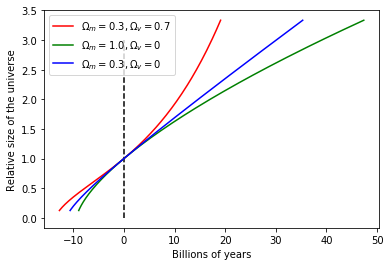

In [96]:
from astropy.cosmology import LambdaCDM
cosmo_RED = LambdaCDM(H0=70, Om0=0.3, Ode0=0.7)
cosmo_GREEN = LambdaCDM(H0=70, Om0=1.0, Ode0=0.)
cosmo_BLUE = LambdaCDM(H0=70, Om0=0.3, Ode0=0.0)


n = 1000
z_min = -0.7
z_max = 7
def plot_expansion(universe_model,n,z_min,z_max,colour,label):
    z_array = np.linspace(z_min,z_max,n)
    a_array = 1/(1+z_array)
    time_RED = []
    age_today = universe_model.age(0)
    for z in z_array:
        time = universe_model.age(z)
        time_RED.append(time.value-age_today.value)
    plt.plot(time_RED,a_array,color=colour,label=label)
    plt.xlabel("Billions of years")
    plt.ylabel("Relative size of the universe")
plot_expansion(cosmo_RED,n,z_min,z_max,'red','$\Omega_m=0.3 , \Omega_v=0.7$')
plot_expansion(cosmo_GREEN,n,z_min,z_max,'green','$\Omega_m=1.0 , \Omega_v=0$')
plot_expansion(cosmo_BLUE,n,z_min,z_max,'blue','$\Omega_m=0.3 , \Omega_v=0$')
plt.legend()
plt.vlines(0,0,3,linestyle='--')

Notice how we require that $\Omega_\Lambda > 0$ for our Universe's expansion to be **accelerating**.

## Connecting to observable quantities

Everything we've done so far assumes that we know the cosmological parameters, and that we want to work out something about our Universe. However, in practice we need to start the other way around. First we need to use observations to contrain the cosmological parameters. Unfortunately, the quantities that we have worked out so far (the scale factor $a$ and the age $t$) are not direclty observable quantities. We now need to work out how cosmological parameters affect *observable* quantities so that we can work backwards and constrain cosmological parameters.

The *distances* to various luminous astronomical objects, while not *easily* measurable, are at least *in principle* measurable. However, it turns out that defining distance is a pretty tricky business in the context of an expanding universe.

The key to measuring distances is a quantity known as the **metric**. If I'm interested in measuring distance in a 3D space, the metric is given by
\begin{equation}
ds^2 = dx^2 + dy^2 +dz^2,
\end{equation}
where quantities like $dx^2$ are shorthand for $(dx)^2$, *not* $d(x^2)$. This is really just a fancy way of writing the Pythagorean theorem: it's an instruction that says that if I want to know the distance between two points, I take the difference between the $x$-coordinates, square it, and add to the $y$-coordinate difference squared etc. I can equivalently write this in terms of spherical coordinates:
\begin{equation}
ds^2 = dr^2 + r^2 (d\theta^2 + \sin^2 \theta d\phi^2)
\end{equation}

In special relativity, we learn that we need to think of space and time together as a larger entity known as spacetime. The "4D distance" (more properly known as the *spacetime interval*) is then given by
\begin{equation}
ds^2 = -c^2 dt^2 + dx^2 + dy^2 +dz^2,
\end{equation}
where notice that the time component has a minus sign---time is fundamentally different from space even though they are part of a larger whole. (Analogy: Quebec is fundamentally different from Ontario, even though they are both part of a larger entity known as Canada!)

One important thing about the metric is that light travels along paths that have $ds^2 = 0$. As an example, imagine that we have a photon travelling purely in the $x$ direction, so that $dy = dz = 0$. Setting $ds^2 = 0$ then tells us that $dx/dt = c$, which is precisely what we expect.

In general relativity, the fact that light travels along paths with $ds^2 =0$ continues to be true. But the metric gets more complicated. Luckily, for our current purposes, it's not too bad. For example, to account for the expanding universe, all I have to do is to insert a factor of the scale factor $a(t)$ in front of the spatial parts (becuase it's space that's expanding):
\begin{equation}
ds^2 = -c^2 dt^2 + a(t)^2 (dx^2 + dy^2 +dz^2) = -c^2 dt^2 + a(t)^2 [dr^2 + r^2 (d\theta^2 + \sin^2 \theta d\phi^2)]
\end{equation}
*where I have assumed that our Universe is spatially flat, i.e., $\kappa = 0$ (or equivalently, $\Omega_k = 0$)*. The general case is a little bit [more complicated](https://en.wikipedia.org/wiki/Friedmann%E2%80%93Lema%C3%AEtre%E2%80%93Robertson%E2%80%93Walker_metric).

<div>
<img src="images/StandardRuler.jpg" width="450">
</div>


Now let's talk about how this works when it comes to distances that we might be able to observably measure. It turns out that in cosmology there are different ways of definining distances to an object, and these different definitions give different answers! One way we can define a distance is to imagine we have some **standard ruler** with a known length (e.g., $1\,\textrm{m}$). Then the smaller the ruler appears (see image above), the farther away it is. To make this more precise, if we know $D$ in the diagram below, we can measure $\delta \theta$ and do some geometry to determine how far away the ruler is.

<div>
<img src="images/triangle.png" width="450">
</div>



Using the "normal" rules of geometry, we would say that the distance $D_A$ (the long legs of the triangle) is given by
\begin{equation}
D_A \equiv \frac{D }{ \delta \theta}.
\end{equation}
Notice how I used "$\equiv$" instead of "$=$". This is because in cosmology we *define* $D_A$ to be such that this equation is true. The quantity $D_A$ is known as the **angular diameter distance**. Now, suppose we lay out our standard ruler so that the $\phi$ and $r$ coordinates are the same between the two ends of the ruler. Our metric then tells us that if we measure the positions of the two ends at the same instant in time (so that $dt=0$), the transverse distance D is given by
\begin{equation}
D = \int ds = a(t_1) r_1 \int d\theta = a(t_1) r_1 \delta \theta \qquad (1)
\end{equation}
We now note that we see the ruler because photons travel from the two ends of our ruler. In fact, the time $t_1$ in the equation above refers to the time when the photons started travelling towards us. Photons, remember, travel on paths where $ds=0$, and from our diagram, we have our photons traveling along paths where $d\theta = d\phi = 0$. Again from our metric, this tells us that
\begin{equation}
0 = -c^2 dt^2 + a^2(t) dr^2 \Rightarrow r_1 = \int_{t_1}^{t_0} \frac{c dt}{a(t)}.
\end{equation}
Combining our equations then reveals
\begin{equation}
D_A = r_1 a(t_1) = a(t_1) \int_{t_1}^{t_0} \frac{c dt}{a(t)}.
\end{equation}
(Warning: because we assumed a flat universe when we wrote our metric, this equation is also only true for a flat universe). If we see photons from a distant ruler (or galaxy) that were emitted at time $t_1$ and received today at time $t_0$, the angular diameter distance to this ruler is given by the expression above. It's often handier to rewrite this in terms of redshift using $1+z = 1/a$ and the Friedman equation. This gives
\begin{equation}
D_A = \frac{c}{H_0 (1+z)} \int_0^z \frac{dz^\prime}{ \sqrt{\Omega_{m,0}(1+z^\prime)^3 + \Omega_{r,0}(1+z^\prime)^4 + \Omega_{\Lambda} + \Omega_{k,0} (1+z^\prime)^2 + \dots}} \qquad (2)
\end{equation}
This is nice because it tells me the angular diameter distance to an object at redshift $z$.

An alternative to measuring distances using standard rulers is to use **standard candles**. The idea is that if I know the intrinsic luminosity of some object, then I can tell how far away it is by seeing how bright it appears. In other words, I can say the flux of an object and its intrinsic luminosity are related by
\begin{equation}
F \equiv \frac{L}{4 \pi D_L^2} \qquad (3)
\end{equation}
Notice that this is again a definition. The quantity $D_L$ is known as the **luminosity distance**, and is *defined* so that the inverse square law (Equation 2) works. This is just as valid a definition of distance as the angular diameter distance. In a static universe, $D_L$ would equal $D_A$. In an expanding universe, they are different! There is no "right" way to measure distance in cosmology; one just has to be precise about what one means.

We can derive an expression for the luminosity distance. Imagine some source with luminosity $L$. The power of this source is spread of a sphere of surface area $4 \pi s^2 = 4 \pi a(t_0) r_1^2$ (using similar manipulations as we used in Equation 1). But not only are the photons spread out over a sphere, but as they travel towards us, they are *redshifted*. Since $E= hf = hc/\lambda$, each photon's energy gets multiplied by a ratio of $a(t_1) / a(t_0)$ (i.e., it ends up smaller). It turns out that there is an additional factor of $a(t_1) / a(t_0)$ due to time dilation---if two photons are initially emitted at some time interval $\delta t$ apart, they will be received at an interval $\delta t a(t_0)/ a(t_1)$ apart. This is greater than $\delta t$ [remember that $t_0$ stands for the present time, so $a(t_0) > a(t_1)$], so this reduces the rate of reception of photons. The received brightness is thus lowered by yet another factor of $a(t_1) / a(t_0)$, and we have

\begin{equation}
F = \frac{L}{4 \pi a(t_0) r_1^2 }\left(\frac{a(t_1)}{a(t_0)}\right)^2 = \frac{La(t_1)^2}{4 \pi  r_1^2 },
\end{equation}
where we have again used the fact that $a(t_0) = 1$. Comparing this to Equation (3) then tells us that
\begin{equation}
D_L = \frac{r_1}{a(t_1)} = \frac{D_A }{a(t_1)^2} = D_A (1+z)^2,
\end{equation}
so two perfectly sensible definitions of distance give us dramatically different results at high $z$! To write this out the full expression, we can say
\begin{equation}
D_L = \frac{c}{H_0 } (1+z)\int_0^z \frac{dz^\prime}{ \sqrt{\Omega_{m,0}(1+z^\prime)^3 + \Omega_{r,0}(1+z^\prime)^4 + \Omega_{\Lambda} + \Omega_{k,0} (1+z^\prime)^2 + \dots}} \qquad (4)
\end{equation}

Again, I'll caution you that **we have assumed a flat universe with $\Omega_{k} = 0$.** For more general expressions, see [Hogg (1999)](https://arxiv.org/abs/astro-ph/9905116).

One final note on distances. Note that all distances seem to have a prefactor $c/ H_0$. For convenience, we sometimes define this as the *Hubble distance* $D_H \equiv c/ H_0$. This is not the distance to some object, but is an order-of-magnitude scale for cosmological distances.

**Exercise:** Plot $D_L(z)$ and $D_A (z)$ using the cosmological parameter values obtained in Planck 2015. Do any of the trends suprise you? (Hint: do any of the functions listed [here](https://docs.astropy.org/en/stable/api/astropy.cosmology.FLRW.html) seem like they might be useful? Once you've identified the right functions, access them using `cosmo.{function name here}`).

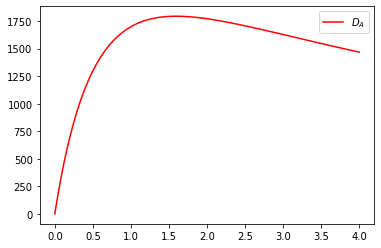

In [102]:
cosmo = Planck15
zmin = 0
zmax = 4
n=100
def plot_DL(cosmo,zmin,zmax,n):
    z_arr = np.linspace(zmin,zmax,n)
    D_l = cosmo.luminosity_distance(z_arr)
    plt.plot(z_arr,D_l.value,color='blue',label='$D_L$')
#plot_DL(cosmo,zmin,zmax,n)

def plot_DA(cosmo,zmin,zmax,n):
    z_arr = np.linspace(zmin,zmax,n)
    D_a = cosmo.angular_diameter_distance(z_arr)
    plt.plot(z_arr,D_a.value,color='red',label='$D_A$')
plot_DA(cosmo,zmin,zmax,n)
plt.legend()


In [ ]:
## Your discussion here.

## Using supernovae to measure cosmological parameters

Supernovae are explosive deaths of massive stars. Measurements of supernovae can be used to empirically measure $D_L$, and thus to constrain the values of cosmological parameters:
1. A special type of supernova are known as "Type Ia". These supernovae are *standardizable candles*. Recall that a standard candle is a class of object where every example of this type of astronomical object has a known intrinsic luminosity $L$. A standardizable candle is one where the object becomes a standard candle once some small corrections are made to the observations. With a known luminosity $L$ and an observed flux $F$, we can compute $D_L$ using Equation (3).
2. If we have a large number of supernovae over a variety of redshifts, we end up with an empirical measurement of $D_L(z)$, i.e., the LHS of Equation (4). The redshifts can be obtained by taking spectra of the host galaxies of the observed supernovae.
3. We can then plug in different combinations of cosmological parameters for the RHS of Equation (4) to arrive at a prediction for $D_L(z)$. The combination that fits the data best represents our set of best-fitting cosmological parameters.

We can think of Equation (4) as an advanced version of the Hubble Law. To see this, note that at $z \ll 1$ where the Hubble Law holds, we have $z \sim v / c$. This means that we can write the Hubble Law as
\begin{equation}
d = \frac{c}{H_0} z,
\end{equation}
which is of the same form as Equation (2), with a distance on the LHS and a RHS proportional to $c/H_0$. The differnce, of course, is the plain Hubble Law is proportional to $z$, whereas Equation (4) has a much more complicated function of $z$.

The [Supernova Cosmology Project Union 2.1 Compilation](http://supernova.lbl.gov/Union/) is a "sanitized" list of Type Ia SNe that have been used to constrain cosmological parameters. Included in the directory for this Coding Lab is a file called ``SCPUnion2.1_mu_vs_z.txt``. We will use the data in the file to convince ourselves that $\Omega_\Lambda >0$ (or equivalently, that our Universe's expansion is accelerating), which is what got Saul Perlmutter, Brian Schmidt, and Adam Reiss the 2011 Nobel Prize in Physics.

**Exercise:** Recreate the classic plot shown below, which is taken from [Reiss et al. (1998)](https://iopscience.iop.org/article/10.1086/300499/meta), but using the more recent Union 2.1 data. Notice that the vertical axis is *not* the luminosity distance. It is the distance modulus $m-M = 5 \log_{10} D_L + 25$, where $D_L$ is measured in Mpc (can you figure out how to get this formula from the one we used in class?) You may want to pick slightly different cosmological parameters than Reiss et al. did. At this point, there is no need to actually do a proper fit for the different cosmological parameters. We will return to this later in the course.

<div>
<img src="images/Reiss.png" width="450">
</div>


In [ ]:
## Your code goes here.

We've completed the loop now. If anyone asks you how we know the age of our Universe, you know the answer:
* Observations allow us to pin down the cosmological parameters
* We plug these observations back into the Friedman equation, which describes how gravity affects the expansion of our Universe.
* We integrate the Friedman equation to give us the age of the universe.

## Git back to git

There's still some git stuff to do! Head back to the git PDF document to finish this lab.